In [1]:
import sys
sys.path.append("..")

import numpy as np
import ujson as json
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from lib.dataclasses import SignalDCT, SignalTime, SingleSample, Sample, SignalSpectrum
from lib.utils import get_sample_from_json

Variables

In [2]:
PATH_TO_DATASET = "/workspaces/project/raw/"

JSON_MAPPINGS = {
    "c4t2_x:+X[g]": "cable4_x",
    "c4t2_y:+Y[g]": "cable4_y",
    "c4t2_z:+Z[g]": "cable4_z",
    "c3t2_x:+X[g]": "cable3_x",
    "c3t2_y:+Y[g]": "cable3_y",
    "c3t2_z:+Z[g]": "cable3_z",
    "c2t2_x:+X[g]": "cable2_x",
    "c2t2_y:+Y[g]": "cable2_y",
    "c2t2_z:+Z[g]": "cable2_z",
    "c1t2_x:+X[g]": "cable1_x",
    "c1t2_y:+Y[g]": "cable1_y",
    "c1t2_z:+Z[g]": "cable1_z",
    "S4_T4[N]": "cable4_tension",
    "S3_T2[N]": "cable3_tension",
    "S2_T2[N]": "cable2_tension",
    "S1_T2[N]": "cable1_tension",
}
# including DCT indexes
for k in list(JSON_MAPPINGS.keys()):
    if k.endswith("[g]"):
        JSON_MAPPINGS[f"index_{k}"] = f"index_{JSON_MAPPINGS[k]}"

# Importing data

In [3]:
from datetime import datetime

In [ ]:
sample_list = []
for file_path in tqdm(os.listdir(PATH_TO_DATASET)):
    sample_id = file_path.split(".json")[0]
    sample = get_sample_from_json(
        path = PATH_TO_DATASET + file_path,
        sample_id=sample_id,
        json_mappings=JSON_MAPPINGS
    )
    sample_list.append(sample)

In [10]:
tensions = [sample.sample_c1.tension for sample in sample_list]
dates = [sample.sampled_at for sample in sample_list]

(2500.0, 3000.0)

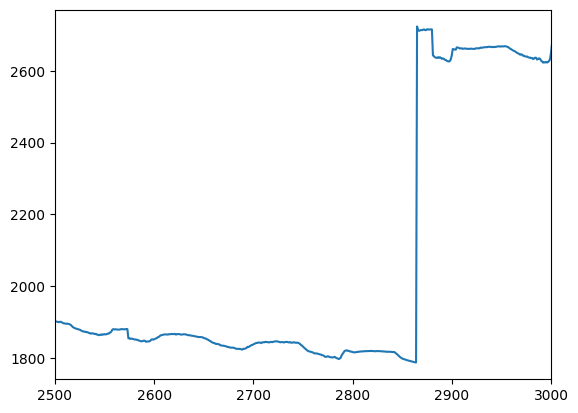

In [13]:
plt.plot(tensions)
plt.xlim([2500,3000])